In [2]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.axes as ax
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

"""-----------------------------Task 1-----------------------------"""

_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0




Check if samples are consistent with priors
Check if observed data is possible to obtain using priors.

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


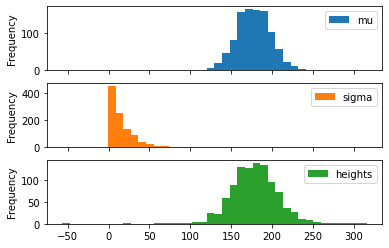

/home/kasia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


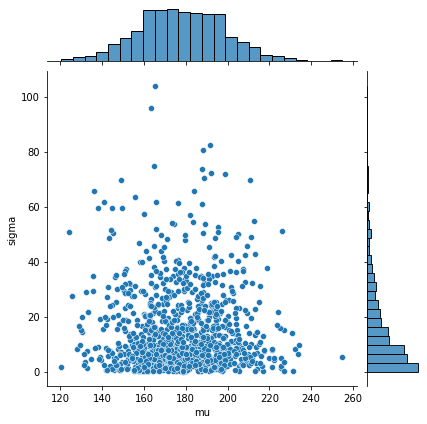

In [10]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)


#histograms
mu = sim.stan_variable(var='mu')
sigma  = sim.stan_variable(var='sigma')
sim_height = sim.stan_variable(var='height')
df = pd.DataFrame({'mu': mu, 'sigma': sigma, 'heights':sim_height})
df.plot.hist(subplots=True, bins=40)
plt.show()


#joint distribution
df2 = pd.DataFrame({'mu': mu, 'sigma': sigma})
sns.jointplot(df2.mu, df2.sigma)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


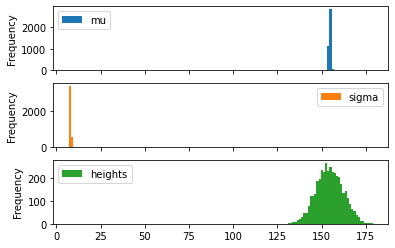

/home/kasia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


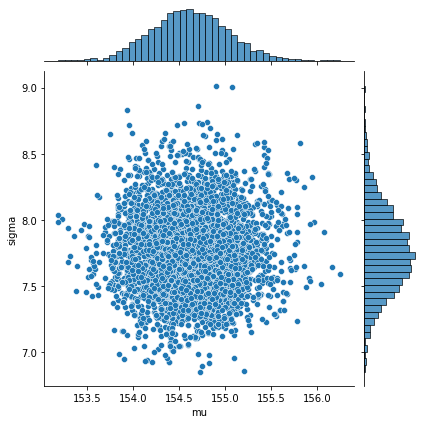

In [20]:
"""-----------------------------Task 2-----------------------------"""

model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)


mu = fit.stan_variable(var='mu')
sigma  = fit.stan_variable(var='sigma')
height = fit.stan_variable(var='height')
df3 = pd.DataFrame({'mu': mu, 'sigma': sigma, 'heights': height})


#histograms
df3.plot.hist(subplots=True, bins=140)
plt.show()

#joint distribution
sns.jointplot(df3.mu, df3.sigma)


Task 4. Prior predictive checks
Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

In [5]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000

d = d.assign(c_weight = d.weight/d.weight.mean())
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)




INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


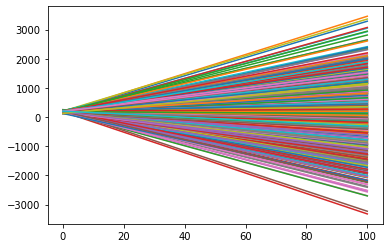

Max:  463.426
Min:  -166.852


In [61]:

alpha = sim.stan_variable(var='alpha')

beta  = sim.stan_variable(var='beta')
x = np.array([0, 100])

for i , j in zip(alpha,beta):    
    y=j*x + i
    plt.plot(x, y)
    
plt.show()

print('Max: ',np.max(sim.stan_variable(var='height')))
print('Min: ',np.min(sim.stan_variable(var='height')))      

Task 5. Prior predictive checks
Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


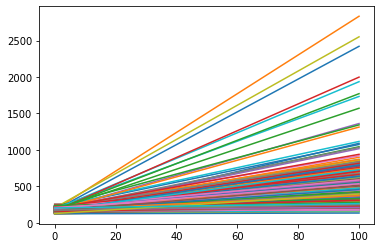

Max:  461.934
Min:  -159.004


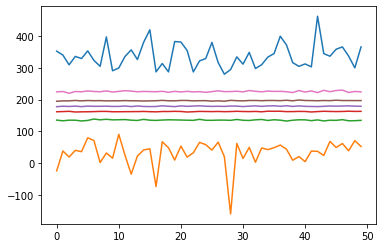

In [36]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)


alpha = sim.stan_variable(var='alpha')

beta  = sim.stan_variable(var='beta')
x = np.array([0, 100])

for i , j in zip(alpha,beta):    
    y=j*x + i
    plt.plot(x, y)
    
plt.show()

print('Max: ',np.max(sim.stan_variable(var='height')))
print('Min: ',np.min(sim.stan_variable(var='height')))



maximum = []
minimum = []
q05=[]
q25=[]
q50=[]
q75=[]
q95=[]
quantiles=[q05,q25,q50,q75,q95]
quantile_levels=[0.05, 0.25, 0.5, 0.75, 0.95]
heights = sim.stan_variable('height')
for elem in range(heights.shape[-1]):
    temp_arr = heights[:, elem]
    maximum.append(np.max(temp_arr))
    minimum.append(np.min(temp_arr))
    for quantile, level in zip(quantiles, quantile_levels):
        quantile.append(np.quantile(temp_arr, level))
plt.plot(maximum)
plt.plot(minimum)
for q in quantiles:
    plt.plot(q)
plt.show()

Task 6. Preparing data for fit
Create data_fit dictionary containing data from N first rows of dataframe

In [12]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')
N=200
data_fit= { 'N': N, 'weight': d['weight'].head(N), 'heights':d['height'].head(N) }

INFO:cmdstanpy:found newer exe file, not recompiling


Task 7. Evaluating model
Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.

In [13]:
fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


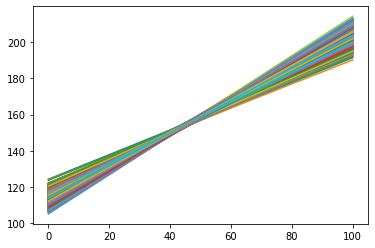

Max:  461.934
Min:  -159.004


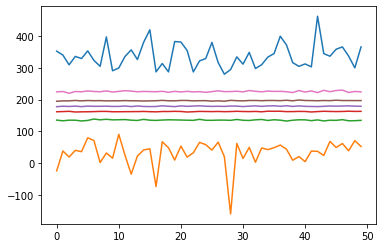

In [37]:
alpha = fit.stan_variable(var='alpha')

beta  = fit.stan_variable(var='beta')
x = np.array([0, 100])

for i , j in zip(alpha,beta):    
    y=j*x + i
    plt.plot(x, y)
    
plt.show()

print('Max: ',np.max(sim.stan_variable(var='height')))

print('Min: ',np.min(sim.stan_variable(var='height')))
summary=fit.summary()
heights =fit.stan_variable(var='height')
maximum = []
minimum = []
q05=[]
q25=[]
q50=[]
q75=[]
q95=[]
quantiles=[q05,q25,q50,q75,q95]
quantile_levels=[0.05, 0.25, 0.5, 0.75, 0.95]
heights = sim.stan_variable('height')
for elem in range(heights.shape[-1]):
    temp_arr = heights[:, elem]
    maximum.append(np.max(temp_arr))
    minimum.append(np.min(temp_arr))
    for quantile, level in zip(quantiles, quantile_levels):
        quantile.append(np.quantile(temp_arr, level))
plt.plot(maximum)
plt.plot(minimum)
for q in quantiles:
    plt.plot(q)
plt.show()


# Part 2

In [16]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


505980908


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


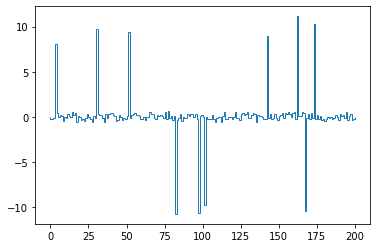

In [23]:
data_genetator = CmdStanModel(stan_file = 'generate_data.stan')
I= len('Katarzyna')
N= len('Watorska')
DoB= 50598
seed=int(DoB*1e4+100*I+N)
print(seed)
generated_data = data_genetator.sample(chains=1, iter_sampling=1, iter_warmup=0, fixed_param=True,seed=seed)

beta_s = generated_data.stan_variable('beta')
plt.stairs(generated_data.stan_variable('beta')[0])

In [24]:
model_uniform = CmdStanModel(stan_file = 'model1.stan')
data_for_inference = {'N':100,
                      'M':200,
                      'X':generated_data.stan_variable('X')[0],
                      'y':generated_data.stan_variable('y')[0]
                      }
fit_unf = model_uniform.sample(data=data_for_inference,seed=seed)
print(fit_unf.diagnose())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /tmp/tmppag21cz4/model1-20220402165737_1.csv, /tmp/tmppag21cz4/model1-20220402165737_2.csv, /tmp/tmppag21cz4/model1-20220402165737_3.csv, /tmp/tmppag21cz4/model1-20220402165737_4.csv

Checking sampler transitions treedepth.
4000 of 4000 (100.00%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.11, is below the nominal threshold of 0.30 which suggests that HMC may have trouble exploring the target distribution.
If possible, try to reparameterize the model.

The following parameters had fewer than 0.001 effective draws per transition:
  beta[1], beta[2], beta[3], beta[4], beta[5], beta[6], beta[7], beta[8], beta[9], beta[10], beta[11], beta[12], be

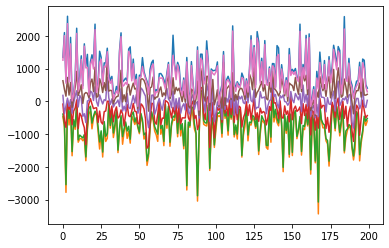

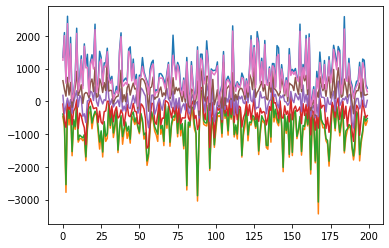

In [31]:
#quantiles

maximum = []
minimum = []
q05=[]
q25=[]
q50=[]
q75=[]
q95=[]
quantiles=[q05,q25,q50,q75,q95]
quantile_levels=[0.05, 0.25, 0.5, 0.75, 0.95]

beta = fit_unf.stan_variable(var='beta')
for elem in range(beta.shape[-1]):
    temp_arr = beta[:, elem]
    maximum.append(np.max(temp_arr))
    minimum.append(np.min(temp_arr))
    for quantile, level in zip(quantiles, quantile_levels):
        quantile.append(np.quantile(temp_arr, level))
plt.plot(maximum)
plt.plot(minimum)
for q in quantiles:
    plt.plot(q)
plt.show()


#residues

residuals = beta - data_for_inference['X'][:,0]

maximum = []
minimum = []
q05=[]
q25=[]
q50=[]
q75=[]
q95=[]
quantiles=[q05,q25,q50,q75,q95]
quantile_levels=[0.05, 0.25, 0.5, 0.75, 0.95]

for elem in range(residuals.shape[-1]):
    temp_arr = residuals[:, elem]
    maximum.append(np.max(temp_arr))
    minimum.append(np.min(temp_arr))
    for quantile, level in zip(quantiles, quantile_levels):
        quantile.append(np.quantile(temp_arr, level))
plt.plot(maximum)
plt.plot(minimum)
for q in quantiles:
    plt.plot(q)
plt.show()

In [32]:
model_reg = CmdStanModel(stan_file = 'model2.stan')
fit_reg = model_reg.sample(data=data_for_inference,seed=seed)
print(fit_reg.diagnose())

INFO:cmdstanpy:compiling stan file /home/kasia/Documents/DataAnalytics/Lab4/model2.stan to exe file /home/kasia/Documents/DataAnalytics/Lab4/model2
INFO:cmdstanpy:compiled model executable: /home/kasia/Documents/DataAnalytics/Lab4/model2
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /tmp/tmppag21cz4/model2-20220402173531_1.csv, /tmp/tmppag21cz4/model2-20220402173531_2.csv, /tmp/tmppag21cz4/model2-20220402173531_3.csv, /tmp/tmppag21cz4/model2-20220402173531_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



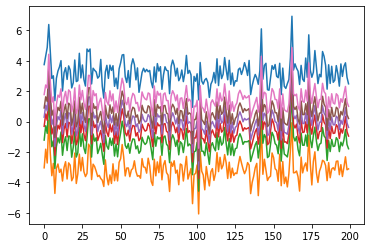

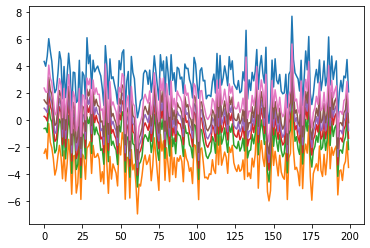

In [33]:
#quantiles

maximum = []
minimum = []
q05=[]
q25=[]
q50=[]
q75=[]
q95=[]
quantiles=[q05,q25,q50,q75,q95]
quantile_levels=[0.05, 0.25, 0.5, 0.75, 0.95]

beta = fit_reg.stan_variable(var='beta')
for elem in range(beta.shape[-1]):
    temp_arr = beta[:, elem]
    maximum.append(np.max(temp_arr))
    minimum.append(np.min(temp_arr))
    for quantile, level in zip(quantiles, quantile_levels):
        quantile.append(np.quantile(temp_arr, level))
plt.plot(maximum)
plt.plot(minimum)
for q in quantiles:
    plt.plot(q)
plt.show()


#residues

residuals = beta - data_for_inference['X'][:,0]

maximum = []
minimum = []
q05=[]
q25=[]
q50=[]
q75=[]
q95=[]
quantiles=[q05,q25,q50,q75,q95]
quantile_levels=[0.05, 0.25, 0.5, 0.75, 0.95]

for elem in range(residuals.shape[-1]):
    temp_arr = residuals[:, elem]
    maximum.append(np.max(temp_arr))
    minimum.append(np.min(temp_arr))
    for quantile, level in zip(quantiles, quantile_levels):
        quantile.append(np.quantile(temp_arr, level))
plt.plot(maximum)
plt.plot(minimum)
for q in quantiles:
    plt.plot(q)
plt.show()

INFO:cmdstanpy:compiling stan file /home/kasia/Documents/DataAnalytics/Lab4/model3.stan to exe file /home/kasia/Documents/DataAnalytics/Lab4/model3
INFO:cmdstanpy:compiled model executable: /home/kasia/Documents/DataAnalytics/Lab4/model3
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /tmp/tmppag21cz4/model3-20220402173755_1.csv, /tmp/tmppag21cz4/model3-20220402173755_2.csv, /tmp/tmppag21cz4/model3-20220402173755_3.csv, /tmp/tmppag21cz4/model3-20220402173755_4.csv

Checking sampler transitions treedepth.
1000 of 4000 (25.00%) transitions hit the maximum treedepth limit of 12, or 2^12 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.03, is below the nominal threshold of 0.30 which suggests that HMC may have trouble exploring the target distribution.
If possible, try to reparameterize the model.

Effective sample size satisfactory.

The following parameters had split R-hat greater than 1.05:
  sigma
Such high values indicate incomplete mixing and biased estimation.
You should consider re

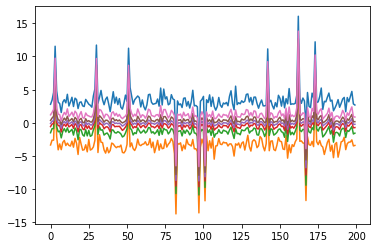

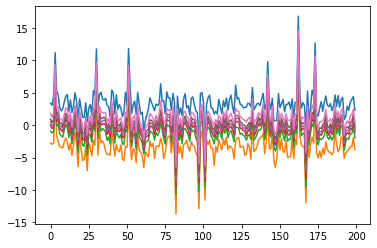

In [34]:
 
model_lap = CmdStanModel(stan_file = 'model3.stan')
fit_lap = model_lap.sample(data=data_for_inference,seed=seed,adapt_delta=0.99,max_treedepth=12) #sampling problematic some parameters have to be adjusted
print(fit_lap.diagnose())


#quantiles

maximum = []
minimum = []
q05=[]
q25=[]
q50=[]
q75=[]
q95=[]
quantiles=[q05,q25,q50,q75,q95]
quantile_levels=[0.05, 0.25, 0.5, 0.75, 0.95]

beta = fit_lap.stan_variable(var='beta')
for elem in range(beta.shape[-1]):
    temp_arr = beta[:, elem]
    maximum.append(np.max(temp_arr))
    minimum.append(np.min(temp_arr))
    for quantile, level in zip(quantiles, quantile_levels):
        quantile.append(np.quantile(temp_arr, level))
plt.plot(maximum)
plt.plot(minimum)
for q in quantiles:
    plt.plot(q)
plt.show()


#residues

residuals = beta - data_for_inference['X'][:,0]

maximum = []
minimum = []
q05=[]
q25=[]
q50=[]
q75=[]
q95=[]
quantiles=[q05,q25,q50,q75,q95]
quantile_levels=[0.05, 0.25, 0.5, 0.75, 0.95]

for elem in range(residuals.shape[-1]):
    temp_arr = residuals[:, elem]
    maximum.append(np.max(temp_arr))
    minimum.append(np.min(temp_arr))
    for quantile, level in zip(quantiles, quantile_levels):
        quantile.append(np.quantile(temp_arr, level))
plt.plot(maximum)
plt.plot(minimum)
for q in quantiles:
    plt.plot(q)
plt.show()